<a href="https://colab.research.google.com/github/AqilulMuttaqin/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


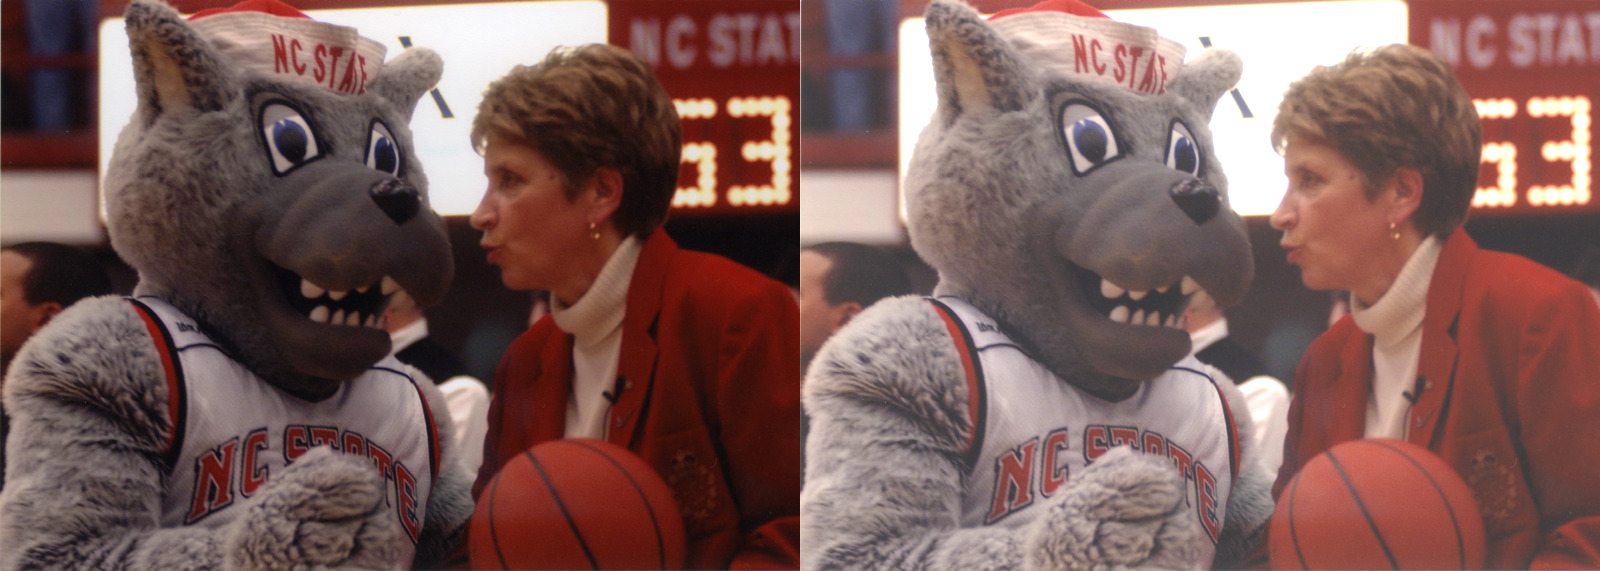

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pikse
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**Keterangan:**  Kode diatas system akan menampilkan text field untuk memasukkan konstanta nilai brightness yang diinginkan, dan akan disimpan pada
variabel brightness. Kemudian ditentukan citra pada drive yang akan diolah dan ditampung di variabel original. Tahap selanjutnya adalah mengakses pixel citra masukan dengan 3 perulangan. Perulangan pertama dilakukan pada shape[0] untuk tinggi citra, perulangan kedua dilakukan pada shape[1] untuk lebar citra, dan perulangan ketiga dilakukan pada shape[2] yang merupakan channel warna pada citra. Setelah melakukan 3 perulangan, dilakukan transformasi linier brightness dengan cara menambahkan nilai brightness pada citra masukan.

   Implementasi inverse citra   
---------------------------------
Masukkan nilai inverse: 50


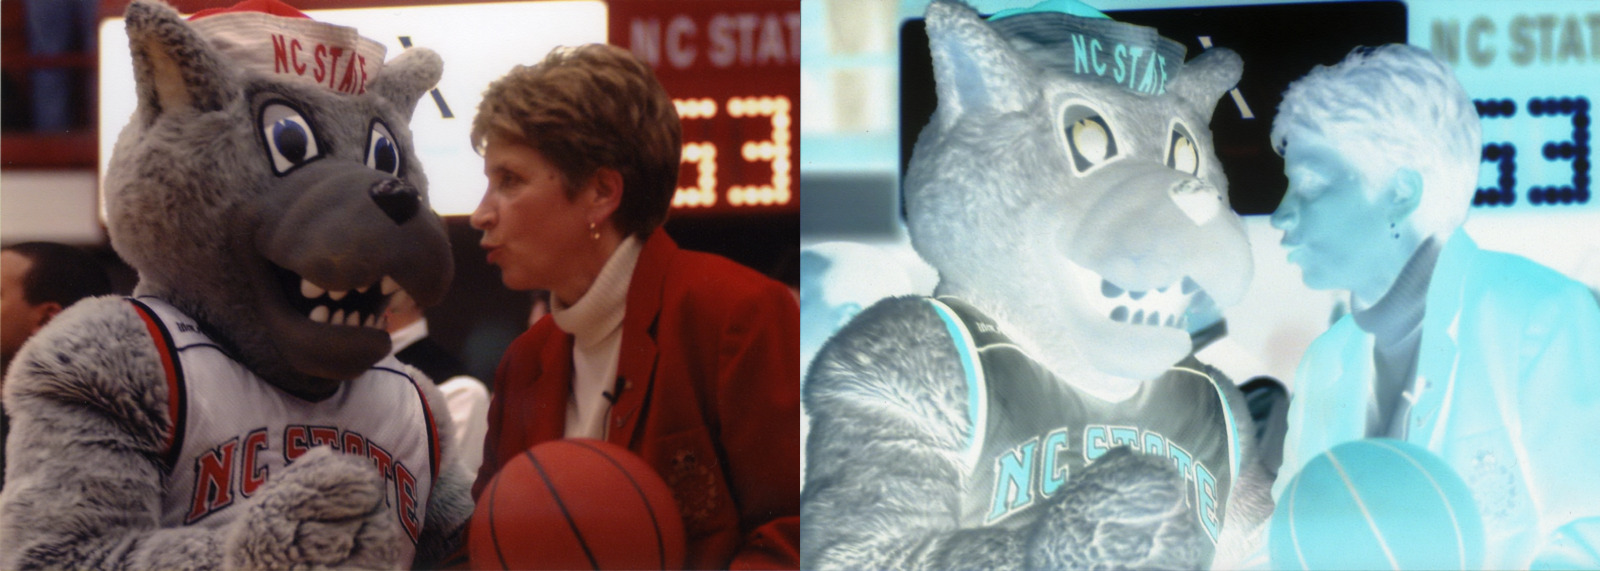

In [ ]:
print('   Implementasi inverse citra   ')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai inverse: '))
except ValueError:
    print('Error, not a number')

def inverse_image(image):
    inverted_image = 255 - image
    return inverted_image

inverted_image = inverse_image(original)

final_frame = cv.hconcat((original, inverted_image))
cv2_imshow(final_frame)

**Keterangan:** Untuk mengimplementasikan inverse citra menggunakan definisi fungsi 'inverse_image', yang menerima satu argumen 'image'. Fungsi ini mengambil citra sebagai masukan dan menghasilkan citra inversinya dengan mengurangkan setiap nilai piksel dari 255. Hasilnya adalah citra dengan warna-warnanya dibalik. Kemudian gambar diproses menggunakan fungsi inverse_image, dan hasil inversinya disimpan dalam variabel inverted_image.

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


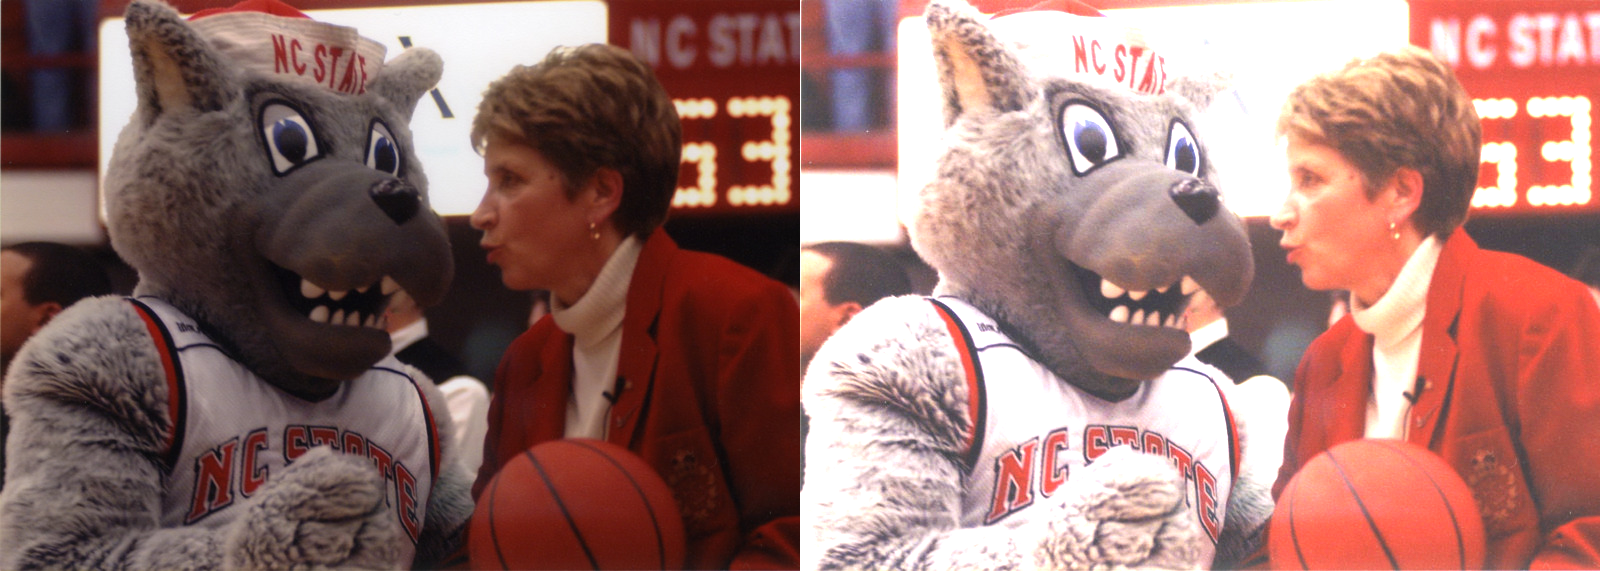

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast_factor = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, masukkan angka yang valid')

def adjust_brightness_contrast(image, brightness, contrast):
    adjusted_image = cv.convertScaleAbs(image, alpha=contrast, beta=brightness)
    return adjusted_image

adjusted_image = adjust_brightness_contrast(original, brightness, contrast_factor)

final_frame = cv.hconcat((original, adjusted_image))
cv2_imshow(final_frame)

**Keterangan:** Kode diatas menggunakan definisi fungsi 'adjust_brightness_contrast', yang menerima tiga argumen: 'image' (citra asli), 'brightness' (tingkat kecerahan yang ingin diterapkan), dan 'contrast' (faktor kontras yang ingin diterapkan). Fungsi ini menggunakan fungsi cv.convertScaleAbs dari OpenCV untuk menerapkan penyesuaian kecerahan dan kontras pada citra asli

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


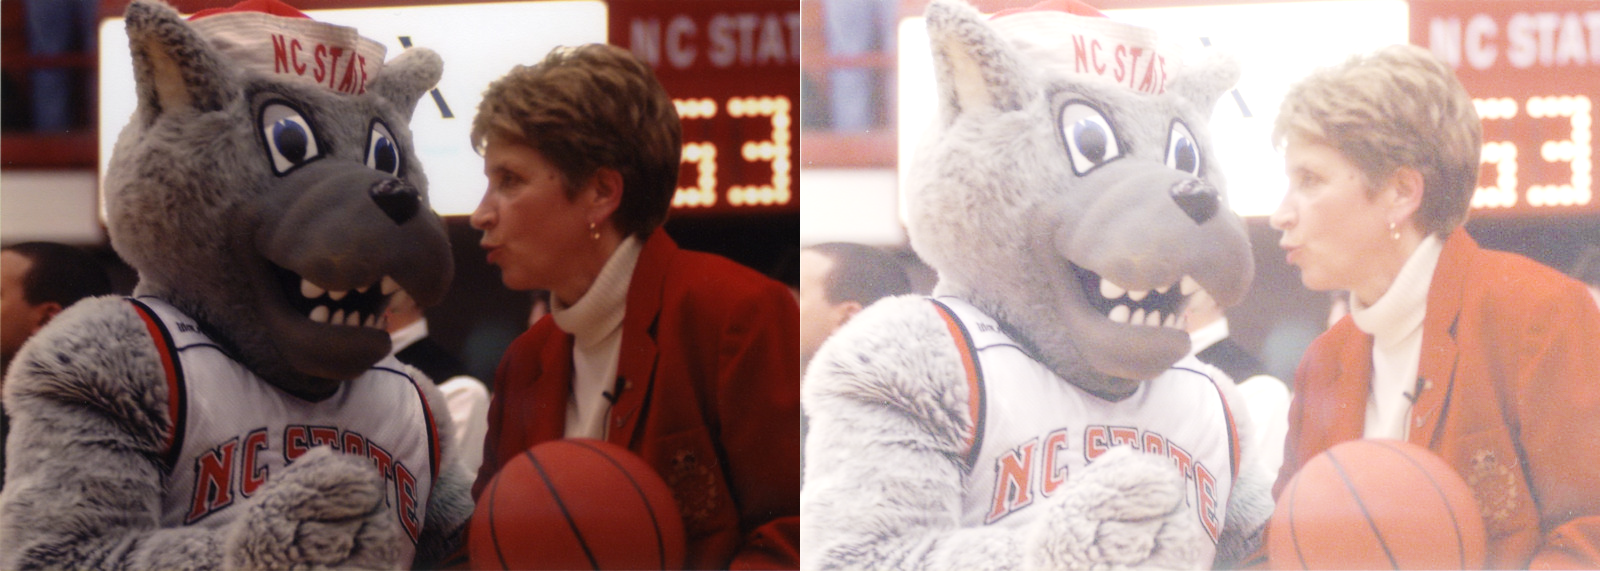

In [ ]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
    brightness_factor = float(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, masukkan angka yang valid')

def logarithmic_brightness(image, factor):
    # Konversi citra ke dalam skala logaritmik
    logarithmic_image = np.log1p(image.astype(float)) * factor

    # Normalisasi kembali ke dalam rentang [0, 255]
    logarithmic_image = np.uint8(np.clip(logarithmic_image, 0, 255))
    return logarithmic_image

logarithmic_image = logarithmic_brightness(original, brightness_factor)

final_frame = cv.hconcat((original, logarithmic_image))
cv2_imshow(final_frame)

**Keterangan:** Kode diatas menggunakan definisi fungsi 'logarithmic_brightness', yang menerima dua argumen: 'image' (citra asli) dan 'factor' (faktor kecerahan yang akan digunakan). Fungsi ini melakukan langkah-langkah berikut:

- Mengkonversi citra ke dalam skala logaritmik menggunakan np.log1p. Ini bertujuan untuk mendapatkan efek peningkatan kecerahan yang tidak linier.
- Mengalikan citra yang telah diubah skala logaritmik dengan faktor kecerahan yang telah diinputkan oleh pengguna.
- Normalisasi kembali citra ke dalam rentang [0, 255] dengan mengubah tipe datanya menjadi np.uint8 dan membatasi nilai piksel ke rentang tersebut.

Kemudian gambar diproses menggunakan fungsi 'logarithmic_brightness' dengan faktor kecerahan (brightness_factor) yang telah diinputkan oleh pengguna. Hasilnya disimpan dalam variabel 'logarithmic_image'.

In [ ]:
import matplotlib.pyplot as plt

original1 = cv.imread('/content/drive/MyDrive/PCVK/monyet.jpg')

 Transformasi Grayscale dengan Metode Averaging 
------------------------------------------------


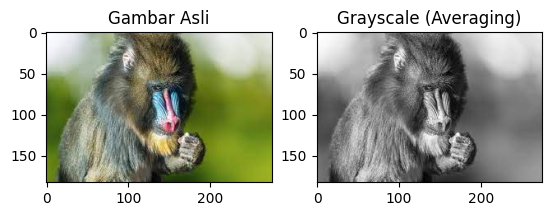

In [ ]:
print(' Transformasi Grayscale dengan Metode Averaging ')
print('------------------------------------------------')

def grayscale_averaging(image):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return gray_image

grayscale_average = grayscale_averaging(original1)

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(original1, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(2, 2, 2)
plt.imshow(grayscale_average, cmap='gray')
plt.title('Grayscale (Averaging)')

plt.show()

**Keterangan:** Kode diatas menggunakan matplotlid dengan mendefinisikan fungsi 'grayscale_averaging', yang menerima satu argumen 'image' (citra berwarna dalam format BGR). Fungsi ini menggunakan OpenCV (cv) untuk mengkonversi citra berwarna ke citra grayscale dengan metode averaging.

 Transformasi Grayscale dengan Metode Lightness 
------------------------------------------------


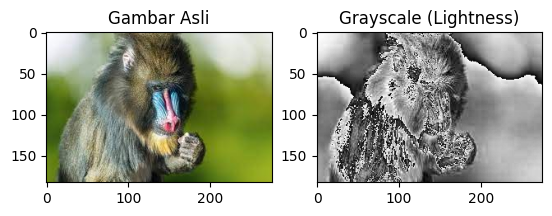

In [ ]:
print(' Transformasi Grayscale dengan Metode Lightness ')
print('------------------------------------------------')

def grayscale_lightness(image):
    gray_image = np.uint8((np.max(image, axis=2) + np.min(image, axis=2)) / 2)
    return gray_image

grayscale_light = grayscale_lightness(original1)

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(original1, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(2, 2, 2)
plt.imshow(grayscale_light, cmap='gray')
plt.title('Grayscale (Lightness)')

plt.show()

**Keterangan:** Kode diatas menggunakan definisi fungsi 'grayscale_lightness', yang menerima satu argumen 'image' (citra berwarna dalam format BGR). Fungsi ini mengkonversi citra berwarna ke citra grayscale dengan metode "Lightness" (kecerahan). Metode ini menghitung nilai kecerahan (lightness) pada setiap piksel dengan menggunakan nilai maksimum (nilai terbesar dari komponen warna RGB) dan nilai minimum (nilai terkecil dari komponen warna RGB) dari setiap piksel tersebut. Hasilnya adalah citra grayscale.

 Transformasi Grayscale dengan Metode Lightness 
------------------------------------------------


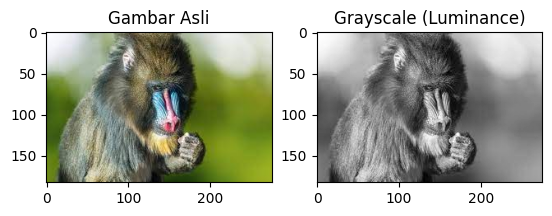

In [ ]:
print(' Transformasi Grayscale dengan Metode Lightness ')
print('------------------------------------------------')

def grayscale_luminance(image):
    gray_image = np.uint8(0.21 * image[:, :, 2] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 0])
    return gray_image

grayscale_luminance = grayscale_luminance(original1)

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(original1, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(2, 2, 2)
plt.imshow(grayscale_luminance, cmap='gray')
plt.title('Grayscale (Luminance)')

plt.show()

**Keterangan:** Kode diatas menggunakan definisi fungsi 'grayscale_luminance', yang menerima satu argumen 'image' (citra berwarna dalam format BGR). Fungsi ini mengkonversi citra berwarna ke citra grayscale dengan metode "Luminance" atau "Brightness." Metode ini menghitung nilai kecerahan (luminance) pada setiap piksel dengan menggunakan faktor bobot tertentu untuk masing-masing komponen warna (0.21 untuk warna merah, 0.72 untuk warna hijau, dan 0.07 untuk warna biru)

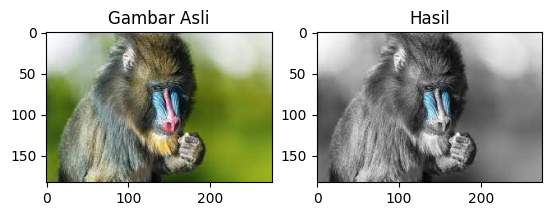

In [ ]:
hsv_image = cv.cvtColor(original1, cv.COLOR_BGR2HSV)

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([150, 255, 255])

mask = cv.inRange(hsv_image, lower_blue, upper_blue)

result = cv.bitwise_and(original1, original1, mask=mask)

gray_mask = cv.bitwise_not(mask)
gray_part = cv.cvtColor(original1, cv.COLOR_BGR2GRAY)
gray_part = cv.cvtColor(gray_part, cv.COLOR_GRAY2BGR)

result_gray = cv.bitwise_and(gray_part, gray_part, mask=gray_mask)
final_result = cv.add(result, result_gray)

plt.subplot(121)
plt.imshow(cv.cvtColor(original1, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(122)
plt.imshow(cv.cvtColor(final_result, cv.COLOR_BGR2RGB))
plt.title('Hasil')

plt.show()

**Keterangan:** Kode diatas diawali dengan konversi dari mode warna BGR ke mode warna HSV. Mode warna HSV memungkinkan segmentasi berdasarkan komponen warna (Hue, Saturation, dan Value). Kemudian mendefinisikan rentang warna biru dalam mode warna HSV. lower_blue adalah nilai batas bawah untuk warna biru, dan upper_blue adalah nilai batas atas. Ini akan digunakan untuk mengidentifikasi piksel-pixel yang berada dalam rentang warna biru ini.

Dengan menggunakan 'cv.inRange' untuk membuat mask (gambar biner) yang membatasi piksel yang berada dalam rentang warna biru yang telah ditentukan. Kemudian menggabungkan citra asli dengan hasil segmentasi. Kemudian membuat citra grayscale yang merupakan kebalikan dari mask (hitam putih), di mana area yang tidak berada dalam rentang warna biru menjadi putih. Citra ini akan digunakan untuk mengambil bagian yang tidak termasuk dalam rentang warna biru dari citra asli. Dengan menggunakan 'cv.bitwise_and' untuk menggabungkan citra hasil segmentasi dengan citra hasil grayscale, dan kemudian menggunakan cv.add untuk menggabungkan hasilnya. Hasil akhirnya adalah citra yang memiliki bagian dalam rentang warna biru dari citra asli dan bagian lainnya dalam bentuk grayscale.